In [1]:
from pathlib import Path
import pandas as pd
from dfply import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [2]:
%load_ext autoreload
%autoreload 2
pd.set_option("max_columns", 10000)
%matplotlib inline

In [3]:
result_dir_path = Path(".").joinpath("result")
if not result_dir_path.exists():
    result_dir_path.mkdir(parents=True)

In [4]:
cancer_data = load_breast_cancer()

data_y = cancer_data.target
data_x = pd.DataFrame(
    cancer_data.data,
    columns=cancer_data.feature_names
)
data_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
train_x, test_x, train_y, test_y = train_test_split(
    data_x,
    data_y,
    test_size=0.2
)

In [7]:
model = RandomForestClassifier()
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1422bd5f8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1423717f0>})

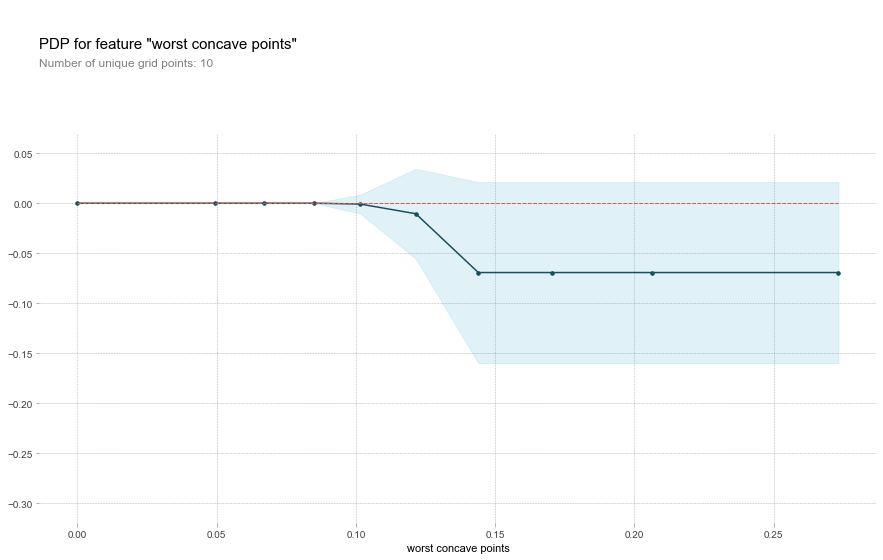

In [8]:
feature_name = "worst concave points"
pdp_feature = pdp.pdp_isolate(
    model=model,
    dataset=test_x,
    model_features=data_x.columns.tolist(),
    feature=feature_name
)
pdp.pdp_plot(pdp_feature, feature_name)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

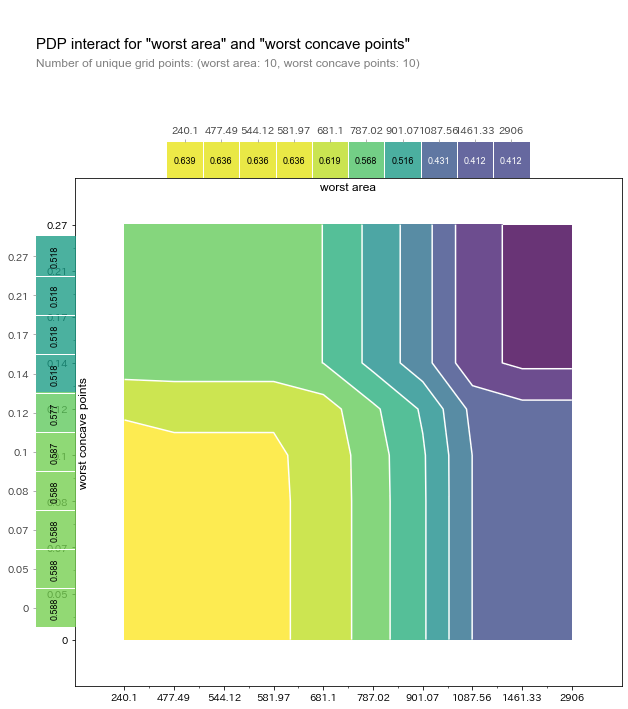

In [13]:
target_features = ["worst area", "worst concave points"]
inter = pdp.pdp_interact(
    model=model,
    dataset=test_x,
    model_features=data_x.columns.tolist(),
    features=target_features
)

pdp.pdp_interact_plot(
    pdp_interact_out=inter,
    feature_names=target_features,
    plot_type="contour",
    plot_pdp=True
)